# Description:
A first exploration of the average values of station 11 is performed in this script. The first identification of the waveform
baselining is done here as well.

# Import Modules:

In [1]:
import numpy as np
import scipy as sc
import scipy.fft as scfft
import matplotlib.pyplot as plt
import uproot

In [2]:
%%capture out
%run ./Functions.ipynb

# Import data:

In [3]:
FileSt11R101=uproot.open("/mnt/c/Users/Jethro/Desktop/Master thesis/RNO_DATA_DIR/station11/run101/combined.root")

In [4]:
RadiantDataSt11R101=FileSt11R101['combined']['waveforms']['radiant_data[24][2048]'].array(library='np')
EventNrsSt11R101=FileSt11R101['combined']['waveforms']['event_number'].array(library="np")
print(RadiantDataSt11R101.shape) #107 is for events, 24 channels & 2048 for each timestep
print(EventNrsSt11R101)
#np.where(EventNumber==18)[0][0]

(107, 24, 2048)
[  6  16  18  19  23  32  33  34  37  40  54  61  67  68  76  79  82  84
  88 101 102 107 109 112 114 118 119 128 135 147 155 156 164 167 170 172
 189 193 197 199 217 218 220 252 254 261 268 269 277 279 282 283 291 294
 307 318 320 343 347 360 363 366 372 378 388 389 393 397 398 403 417 436
 438 440 449 456 463 466 467 474 481 501 502 508 521 526 529 557 576 581
 607 608 609 612 614 618 632 644 666 667 675 681 683 686 691 712 716]


### Total average for each channel

In [5]:
ChAvgs=np.array([])
Chs=np.array([])
for i in range(0,RadiantDataSt11R101.shape[1]):
    ChAvgs=np.append(ChAvgs,ChannelAverage(i,RadiantDataSt11R101))
    Chs=np.append(Chs,"Ch." + str(i))
    print("Average of Ch." + str(i) + ": " + str(ChannelAverage(i,RadiantDataSt11R101)))

Average of Ch.0: 1.6895078855140186
Average of Ch.1: 1.6545296071845794
Average of Ch.2: -0.7862605870327103
Average of Ch.3: 0.35427314544392524
Average of Ch.4: 1.1116475613317758
Average of Ch.5: -0.2806339442172897
Average of Ch.6: 1.0037693487149533
Average of Ch.7: 0.7137804833528038
Average of Ch.8: 1.5841532199182242
Average of Ch.9: 0.27031158732476634
Average of Ch.10: -0.30775408878504673
Average of Ch.11: -0.7622435382593458
Average of Ch.12: 0.8829265844042056
Average of Ch.13: 0.7901531469042056
Average of Ch.14: 2.1211622006425235
Average of Ch.15: -0.034165997371495324
Average of Ch.16: 0.44733407564252337
Average of Ch.17: 1.3139967873831775
Average of Ch.18: 1.9049494377920562
Average of Ch.19: 2.6720529716705608
Average of Ch.20: 1.584390515478972
Average of Ch.21: 1.8199611200350467
Average of Ch.22: 0.7391847984813084
Average of Ch.23: 1.9368565639602804


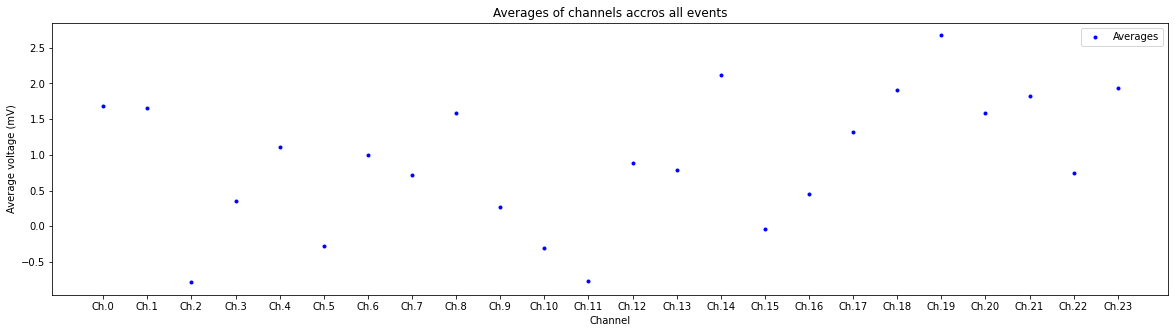

In [6]:
plt.figure(figsize=(20,5)) #visualization 
plt.plot(Chs,ChAvgs,'.',color='b', label="Averages")
plt.title("Averages of channels accros all events")
plt.xlabel("Channel")
plt.ylabel("Average voltage (mV)")
#plt.xlim(0,np.max(freq))
plt.legend()
#plt.savefig("Comparison_Euler_and_RK4_and_analytical")
plt.show()

### Timetrace for certain channel & event

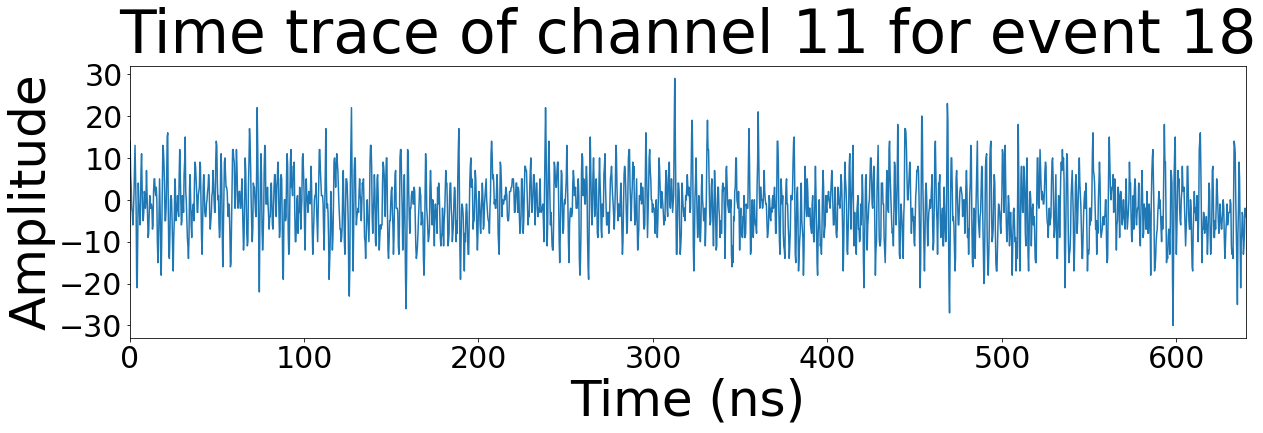

In [7]:
TimeTrace(11,18,RadiantDataSt11R101,EventNrsSt11R101)

###  Average voltage per event for one channel

In [8]:
print(ChannelAvgs(11,RadiantDataSt11R101))

[-1.71972656 -3.39941406 -1.47558594 -2.19384766 -2.32763672 -0.86474609
 -3.14404297 -1.12255859 -3.14941406 -1.54199219 -4.09472656 -2.69335938
 -1.91943359 -4.57861328 -3.61132812 -3.15917969 -0.75927734 -3.27832031
 -0.80419922 -1.19091797 -3.26464844 -3.87451172 -1.76855469 -1.63330078
 -1.21533203 -2.73876953 -0.68017578 -1.35693359 -3.98095703 -0.6875
 -1.16064453 -3.17919922 -1.99951172 -2.828125   -1.87109375 -2.08935547
 -0.93408203 -2.13720703 -3.13378906 -2.35302734 -0.18505859 -0.92382812
 -1.01318359 -0.47216797 -2.50292969 -2.20751953 -1.90332031 -1.65087891
 -0.21142578  0.12060547 -0.29345703 -1.04248047 -2.62548828 -0.27880859
 -1.14404297 -1.40527344 -0.20947266 -0.33349609  1.02880859 -2.56591797
  0.17480469  1.04785156 -1.17089844 -1.87548828 -0.79785156 -3.72363281
 -1.68701172 -1.70898438 -0.46435547 -1.04736328 -1.37060547  0.26855469
 -0.50830078  0.03271484  0.40771484 -0.25634766 -1.46728516  0.86328125
 -0.43115234 -1.93652344 -1.78564453  0.46582031  2.910

#### Visualisation for one channel

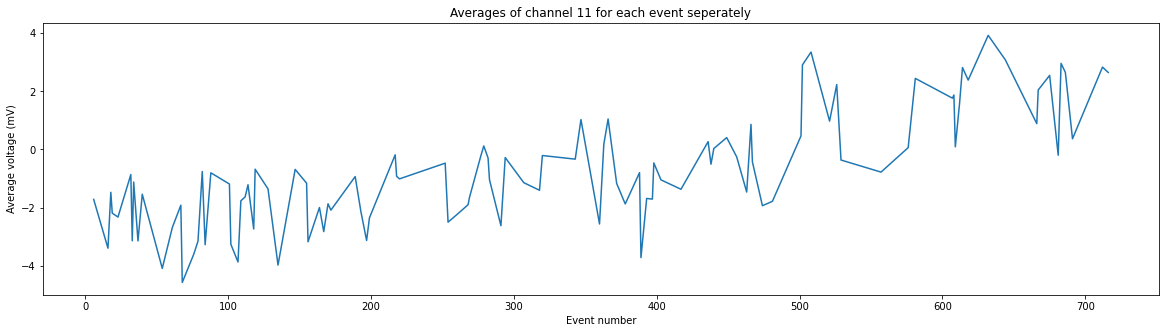

In [9]:
#Events=np.arange(0,RadiantData.shape[0])
PlotChAvgs(11,RadiantDataSt11R101,EventNrsSt11R101)

#### Visualisation for all channels

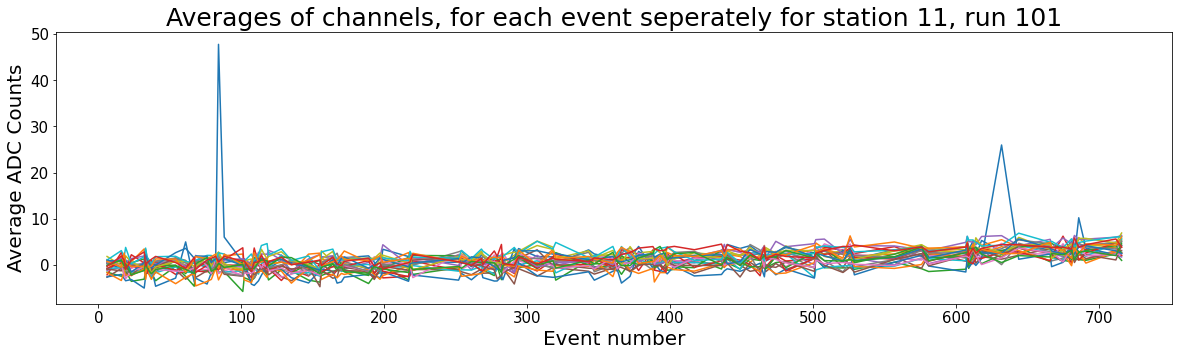

In [10]:
plt.figure(figsize=(20,5)) #visualization
for ChNr in range(RadiantDataSt11R101.shape[1]):
    #if ChNr != 10: #In order to filter channel 10 out of plot
        plt.plot(EventNrsSt11R101,ChannelAvgs(ChNr,RadiantDataSt11R101),'-', label="Channel" + str(ChNr))
plt.title("Averages of channels, for each event seperately for station 11, run 101",fontsize=25)
plt.xlabel("Event number",fontsize=20)
plt.ylabel("Average ADC Counts",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.xlim(0,np.max(freq))
#plt.legend()
#plt.savefig("Comparison_Euler_and_RK4_and_analytical")
plt.show()

#### Fish out anomalous spikes

In [11]:
Threshold=10 #in mV

for ChNr in range(RadiantDataSt11R101.shape[1]): #for every channel
    ChAvgs=ChannelAvgs(ChNr,RadiantDataSt11R101)
    for EventAvgNr in range(0,len(ChAvgs)):
        if ChAvgs[EventAvgNr] >Threshold:
            print("Channel " + str(ChNr) + " has an average of " + str(np.round(ChAvgs[EventAvgNr],2)) + "mV in event " + str(EventNrsSt11R101[EventAvgNr]))

Channel 10 has an average of 47.8mV in event 84
Channel 10 has an average of 25.98mV in event 632
Channel 10 has an average of 10.2mV in event 686


#### Timetraces of anomalous spikes

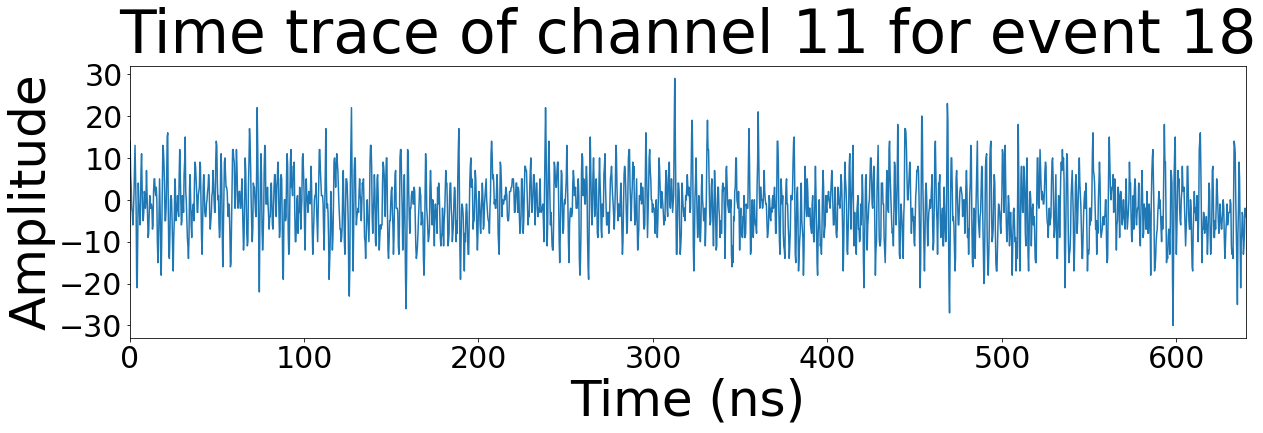

In [13]:
TimeTrace(11,18,RadiantDataSt11R101,EventNrsSt11R101)

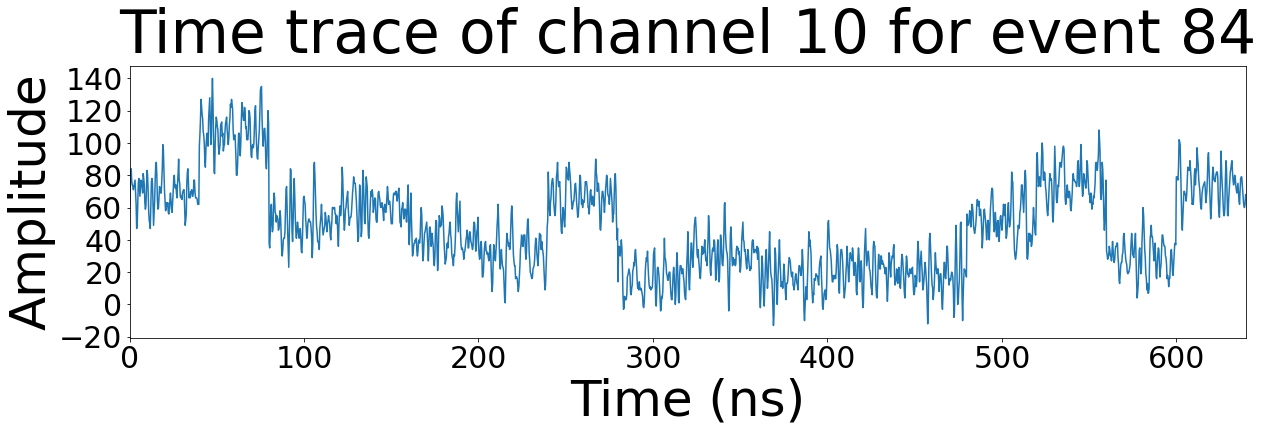

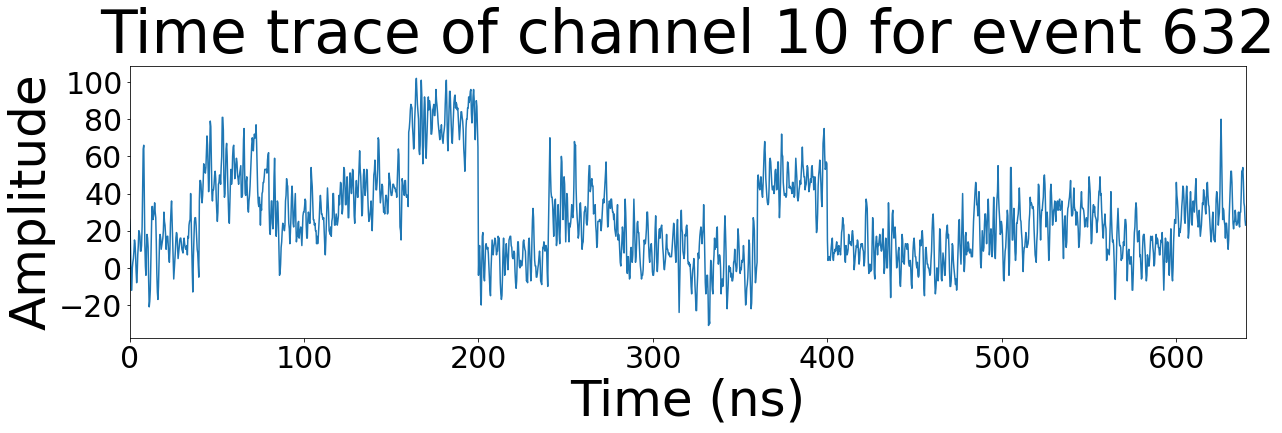

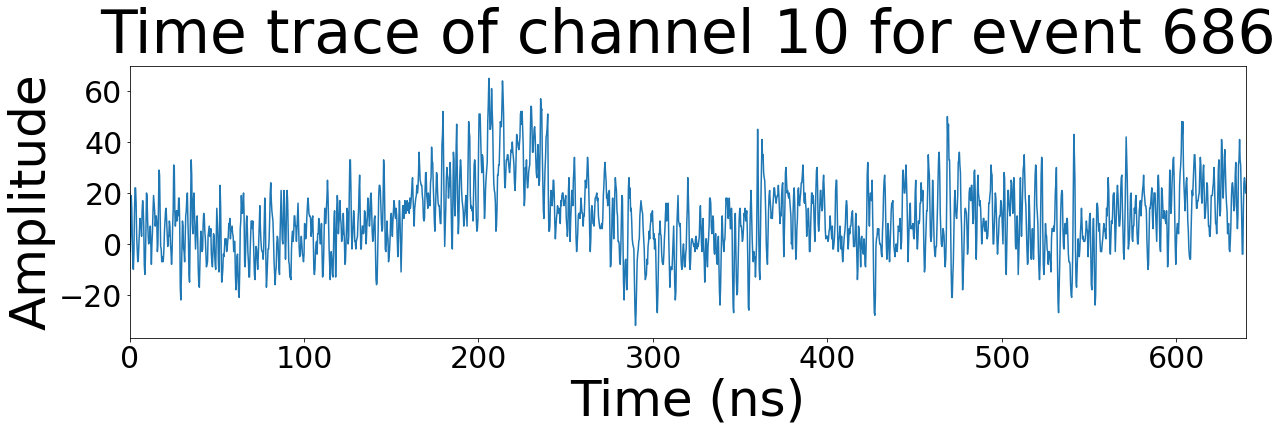

In [12]:
TimeTrace(10,84,RadiantDataSt11R101,EventNrsSt11R101)
TimeTrace(10,632,RadiantDataSt11R101,EventNrsSt11R101)
TimeTrace(10,686,RadiantDataSt11R101,EventNrsSt11R101)